In [ ]:
# This notebook is intended to use betting performance as alternative performance metric.
# Thus we used differently trained models and different betting strategies to find out which combinations were profitable in 2025.

In [ ]:
import pandas as pd
from predicting_US_Open_functions import get_full_master_df, create_features_for_matches, get_player_stats_for_input_df
from data_prep_refactored import create_static_features
import joblib
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Define the filename of model
model_filename = 'tennis_predictor_model.joblib'

# Load the pre-trained model from the file
print(f"Loading trained model from {model_filename}...")
trained_model = joblib.load(model_filename)
print("✅ Model loaded successfully.")

Loading trained model from tennis_predictor_model.joblib...
✅ Model loaded successfully.


In [ ]:
### In the first step we load the data with historical betting odds.

In [78]:
file_path = './2025_raw_data_with_betting_odds.csv'
betting_odds_raw_df = pd.read_csv(file_path)
# Convert format of dates
betting_odds_raw_df['approx_match_date'] = pd.to_datetime(betting_odds_raw_df['approx_match_date'])
pd.set_option('display.max_columns', None)

# Create historical match data
master_df = get_full_master_df(2000,2025,enable_update=False)

# Add ELO stats to data frame for feature generation
ELO_stats_winner = ['winner_ELO', 'winner_ELO_clay', 'winner_ELO_grass', 'winner_ELO_hard']
ELO_stats_loser = ['loser_ELO', 'loser_ELO_clay', 'loser_ELO_grass', 'loser_ELO_hard']
get_ELO_df = get_player_stats_for_input_df(betting_odds_raw_df, master_df)

for i in range(len(ELO_stats_winner)):
    betting_odds_raw_df[ELO_stats_winner[i]] = get_ELO_df[ELO_stats_winner[i]]
    betting_odds_raw_df[ELO_stats_loser[i]] = get_ELO_df[ELO_stats_loser[i]]


display(betting_odds_raw_df.head())

Starting the data loading process...
Successfully loaded 2000.csv
Successfully loaded 2001.csv
Successfully loaded 2002.csv
Successfully loaded 2003.csv
Successfully loaded 2004.csv
Successfully loaded 2005.csv
Successfully loaded 2006.csv
Successfully loaded 2007.csv
Successfully loaded 2008.csv
Successfully loaded 2009.csv
Successfully loaded 2010.csv
Successfully loaded 2011.csv
Successfully loaded 2012.csv
Successfully loaded 2013.csv
Successfully loaded 2014.csv
Successfully loaded 2015.csv
Successfully loaded 2016.csv
Successfully loaded 2017.csv
Successfully loaded 2018.csv
Successfully loaded 2019.csv
Successfully loaded 2020.csv
Successfully loaded 2021.csv
Successfully loaded 2022.csv
Successfully loaded 2023.csv
Successfully loaded 2024.csv
Successfully loaded 2025.csv

✅ All files have been loaded and combined successfully!
The DataFrame has 77198 rows (matches) and 49 columns.
Converting all statistical columns to a numeric data type...
✅ Statistical columns successfully c

67730it [00:01, 51746.73it/s]
1470it [00:15, 97.10it/s] 


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,tourney_length_days,approx_offset_days,approx_match_date,approx_date_uncertain,avg_odds_winner,avg_odds_winner_exists,avg_odds_loser,avg_odds_loser_exists,winner_ELO,loser_ELO,winner_ELO_clay,loser_ELO_clay,winner_ELO_grass,loser_ELO_grass,winner_ELO_hard,loser_ELO_hard
0,2025-336,Hong Kong,Hard,28.0,A,2024-12-29,1.0,KI95,NaN,NaN,Miomir Kecmanovic,R,183.0,SRB,25.331,54.0,1021.0,D0FJ,NaN,NaN,Luciano Darderi,R,183.0,ITA,22.872,44.0,1198.0,6-3 6-3,3.0,R32,67.0,9.0,1.0,57.0,39.0,32.0,8.0,9.0,2.0,2.0,9.0,1.0,53.0,35.0,22.0,10.0,9.0,6.0,9.0,7,0,2024-12-29,False,1.32,True,3.27,True,1588.892395,1632.528966,1536.209083,1673.433269,1508.938008,1480.230576,1588.023564,1408.119209
1,2025-336,Hong Kong,Hard,28.0,A,2024-12-29,2.0,M0CI,NaN,NaN,Fabian Marozsan,R,193.0,HUN,25.227,58.0,935.0,SX50,NaN,NaN,Roman Safiullin,R,185.0,RUS,27.395,60.0,923.0,6-1 7-6(9),3.0,R32,93.0,6.0,3.0,70.0,41.0,30.0,14.0,10.0,1.0,5.0,4.0,3.0,72.0,47.0,29.0,8.0,9.0,10.0,16.0,7,0,2024-12-29,False,2.54,True,1.53,True,1629.613724,1546.310517,1542.900540,1470.317069,1462.210051,1497.060139,1603.871480,1563.531138
2,2025-336,Hong Kong,Hard,28.0,A,2024-12-29,3.0,SU87,NaN,NaN,Lorenzo Sonego,R,191.0,ITA,29.637,53.0,1026.0,N0AE,NaN,NaN,Brandon Nakashima,R,188.0,USA,23.406,38.0,1335.0,7-6(4) 6-3,3.0,R32,90.0,5.0,1.0,61.0,38.0,34.0,17.0,11.0,0.0,0.0,6.0,0.0,56.0,39.0,33.0,10.0,10.0,1.0,2.0,7,0,2024-12-29,False,2.43,True,1.54,True,1600.637245,1669.175762,1521.338687,1504.838617,1552.345559,1551.033846,1582.441760,1650.394163
3,2025-336,Hong Kong,Hard,28.0,A,2024-12-29,4.0,N771,NaN,NaN,Cameron Norrie,L,188.0,GBR,29.352,49.0,1119.0,T0HA,NaN,NaN,Learner Tien,L,180.0,USA,19.075,122.0,493.0,6-3 7-5,3.0,R32,98.0,11.0,1.0,78.0,60.0,38.0,8.0,11.0,5.0,7.0,6.0,5.0,69.0,42.0,27.0,11.0,10.0,5.0,9.0,7,0,2024-12-29,False,1.63,True,2.22,True,1686.538806,1603.748386,1681.248790,1467.873744,1576.102047,1508.383571,1625.263581,1598.491697
4,2025-336,Hong Kong,Hard,28.0,A,2024-12-29,5.0,BU13,NaN,NaN,Zizou Bergs,R,185.0,BEL,25.574,71.0,768.0,M0HT,NaN,NaN,Alejandro Moro Canas,R,183.0,ESP,24.060,169.0,345.0,6-4 6-4,3.0,R32,91.0,11.0,1.0,54.0,38.0,31.0,11.0,10.0,1.0,2.0,2.0,3.0,78.0,48.0,31.0,12.0,10.0,6.0,9.0,7,0,2024-12-29,False,1.46,True,2.66,True,1574.491248,1499.407356,1487.728583,1506.725442,1476.929820,1489.720394,1574.626616,1500.000000


In [ ]:
features_betting_odds_df = create_features_for_matches(betting_odds_raw_df, master_df)
features_betting_odds_target_df = create_static_features(betting_odds_raw_df)['target']

expected_features = trained_model.get_booster().feature_names
aligned_features = features_betting_odds_df.reindex(columns=expected_features, fill_value=0)

0.6625850340136055
[1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1]


In [ ]:
### MAIN BETTING SIMULATION cell

starting_bankroll = 100


def betting_sim(starting_bankroll, fraction_to_bet, predictions, pred_probs, enable_Kelly_criterion = False, enable_bet_selection = False, selection_treshold = 0.5):
    bankroll = [starting_bankroll]
    number_bets = [0]
    profits = [0]
    skip_counter = 0
    

    for i in range(len(predictions)):
        ## Metrics before this round of betting
        # Get current bankroll
        current_bankroll = bankroll[-1]
        # Get bet number
        current_bet_number = number_bets[-1]

        # Dont bet if model is not confident
        if (enable_bet_selection == True) & (pred_probs[i] <= selection_treshold) & (pred_probs[i] >= 1- selection_treshold):
            skip_counter += 1
            continue
        
        # Get betting odds for match
        winner_odds = betting_odds_raw_df.loc[i, 'avg_odds_winner']
        loser_odds = betting_odds_raw_df.loc[i, 'avg_odds_winner']

        # Implement Kelly criterion for bankroll management 
        if enable_Kelly_criterion == True:
            if predictions[i] == 1:
                prognosed_win_probability = pred_probs[i]
                if features_betting_odds_target_df[i] == predictions[i]:
                    betting_odds = winner_odds
                else:
                    betting_odds = loser_odds
                gain_proportion = betting_odds - 1
            else:
                prognosed_win_probability = 1 - pred_probs[i]
                if features_betting_odds_target_df[i] == predictions[i]:
                    betting_odds = winner_odds
                else:
                    betting_odds = loser_odds
                gain_proportion = betting_odds - 1

            fraction_to_bet = (prognosed_win_probability - (1 - prognosed_win_probability)/gain_proportion) * 0.01    # Added additional factor to reduce bet size artifically


        stake = current_bankroll * fraction_to_bet
        payout = 0
        profit = 0
        
        correct_prediction = False
        if features_betting_odds_target_df[i] == predictions[i]:
            correct_prediction = True

        if correct_prediction == True:
            payout = stake * winner_odds



        profit = payout - stake
        current_bet_number += 1

        bankroll.append(current_bankroll + profit)
        number_bets.append(current_bet_number)
        profits.append(profit)

    return number_bets, bankroll, profits  

The mean profit of this model and betting strategy is 0.003416507110841264.
The mean profit of this model and betting strategy is 0.005369314057959584.
The mean profit of this model and betting strategy is 0.0016731676551575117.
The mean profit of this model and betting strategy is -0.02702349788430721.
The mean profit of this model and betting strategy is -0.06538293662758903.
The mean profit of this model and betting strategy is -0.06798096532938545.
The mean profit of this model and betting strategy is -0.06798096532970767.


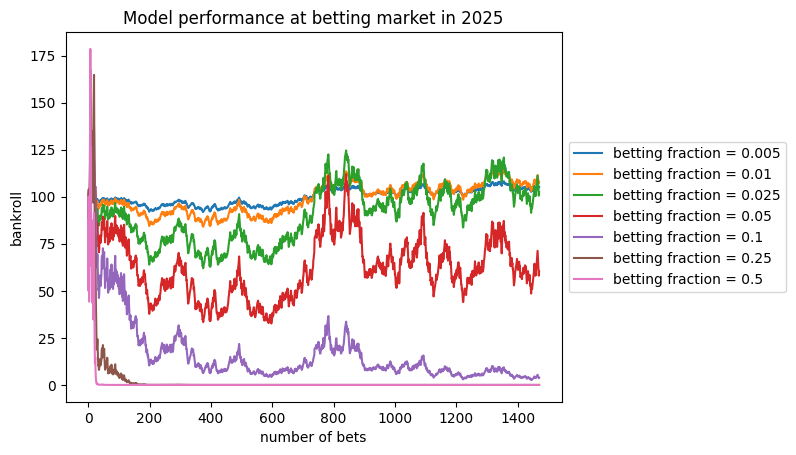

The ending bankrolls of all betting strategies are: [105.02568196004765, 107.89826097925845, 102.46122962073653, 60.24843461218386, 3.821700220816739, 4.740281952094177e-10, 9.460603856984764e-54]
The strategy with the highest ending bankroll is the one with the betting fraction 0.01 with an amount of 107.89826097925845.


In [179]:
### betting simulation cell
## explore return of different betting sizings relative to total bankroll

starting_bankroll = 100
fraction_to_bet = [0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5]
end_bankroll = []

for i in range(len(fraction_to_bet)):
    number_bets, bankroll, profits = betting_sim(starting_bankroll, fraction_to_bet[i] , predictions, pred_probs, enable_Kelly_criterion=False, enable_bet_selection=False)

    print(f'The mean profit of this model and betting strategy is {sum(profits)/(len(profits))}.')
    plt.plot(number_bets, bankroll, label = f'betting fraction = {fraction_to_bet[i]}')
    #plt.scatter(number_bets, profits)
    end_bankroll.append(bankroll[-1])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('number of bets')
plt.ylabel('bankroll')
plt.title('Model performance at betting market in 2025')
plt.show()

print(f'The ending bankrolls of all betting strategies are: {end_bankroll}')
print(f'The strategy with the highest ending bankroll is the one with the betting fraction {fraction_to_bet[end_bankroll.index(max(end_bankroll))]} with an amount of {max(end_bankroll)}.')


The mean profit of this model and betting strategy is -0.02702349788430721.
The mean profit of this model and betting strategy is -0.034247450862213875.
The mean profit of this model and betting strategy is -0.007539000430175158.
The mean profit of this model and betting strategy is 0.042419336336580335.
The mean profit of this model and betting strategy is 0.09561512836141309.
The mean profit of this model and betting strategy is -0.025480643248703142.
The mean profit of this model and betting strategy is 0.005543968560532168.


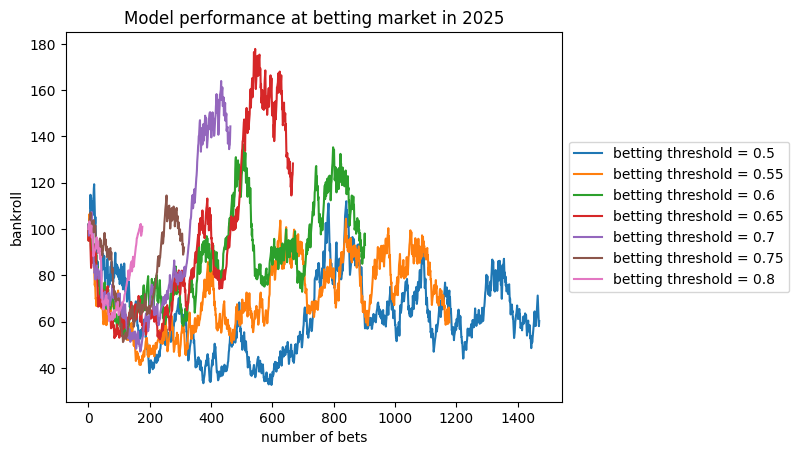

The ending bankrolls of all betting strategies are: [60.24843461218386, 59.65650288431204, 93.192282611552, 128.33611667283566, 144.3654195596957, 92.02455866315597, 100.98128243521425]
The strategy with the highest ending bankroll is the one with the betting treshold 0.7 with an amount of 144.3654195596957.


In [180]:
### Explore the influence of betting selection on outcome, i.e. only betting if the model exceeds a confidence thresh hold

starting_bankroll = 100
betting_treshold = [0.5, 0.55 ,0.6, 0.65, 0.7, 0.75, 0.8]
fraction_to_bet = 0.05
end_bankroll = []

for i in range(len(betting_treshold)):
    number_bets, bankroll, profits = betting_sim(starting_bankroll, fraction_to_bet , predictions, pred_probs, enable_Kelly_criterion=False, enable_bet_selection=True, selection_treshold = betting_treshold[i])

    print(f'The mean profit of this model and betting strategy is {sum(profits)/(len(profits))}.')
    plt.plot(number_bets, bankroll, label = f'betting threshold = {betting_treshold[i]}')
    #plt.scatter(number_bets, profits)
    end_bankroll.append(bankroll[-1])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('number of bets')
plt.ylabel('bankroll')
plt.title('Model performance at betting market in 2025')
plt.show()

print(f'The ending bankrolls of all betting strategies are: {end_bankroll}')
print(f'The strategy with the highest ending bankroll is the one with the betting treshold {betting_treshold[end_bankroll.index(max(end_bankroll))]} with an amount of {max(end_bankroll)}.')


Loading trained model from tennis_predictor_model_balanced_0_6.joblib...
✅ Model loaded successfully.
The mean profit of this model and betting strategy is -0.04283977168893974.
Loading trained model from tennis_predictor_model_balanced_0_65.joblib...
✅ Model loaded successfully.
The mean profit of this model and betting strategy is 0.08407708695839582.
Loading trained model from tennis_predictor_model_balanced_0_7.joblib...
✅ Model loaded successfully.
The mean profit of this model and betting strategy is -0.0018782311116666733.
Loading trained model from tennis_predictor_model_balanced_0_75.joblib...
✅ Model loaded successfully.
The mean profit of this model and betting strategy is -0.03826490435966649.
Loading trained model from tennis_predictor_model_balanced_0_8.joblib...
✅ Model loaded successfully.
The mean profit of this model and betting strategy is -0.04295400569435269.
Loading trained model from tennis_predictor_model_balanced_0_85.joblib...
✅ Model loaded successfully.
The 

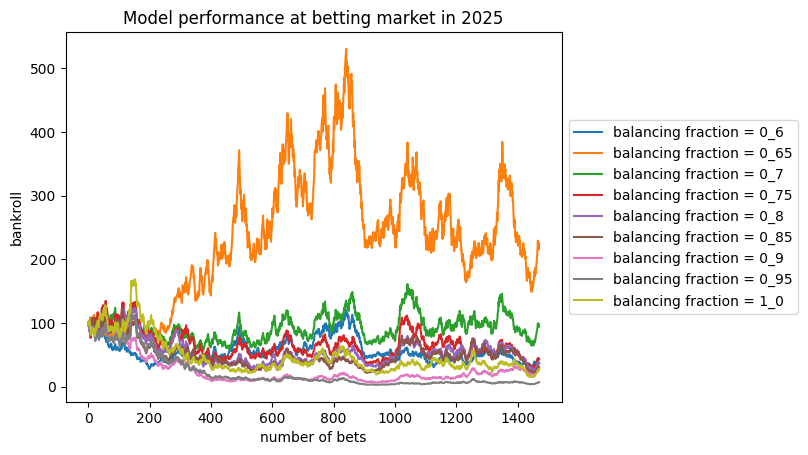

The ending bankrolls of all betting strategies are: [36.982695845569566, 223.67739491580028, 97.23712203473828, 43.712325686930654, 36.814657623607204, 30.979767079486038, 28.004239885510355, 7.158941437788304, 27.95037676560594]
The strategy with the highest ending bankroll is the one with the balancing fraction 0_65 with an amount of 223.67739491580028.
Loading trained model from tennis_predictor_model_balanced_0_6.joblib...
✅ Model loaded successfully.
The mean profit of this model and betting strategy is -0.04974074979137808.
Loading trained model from tennis_predictor_model_balanced_0_65.joblib...
✅ Model loaded successfully.
The mean profit of this model and betting strategy is -0.04875743693154968.
Loading trained model from tennis_predictor_model_balanced_0_7.joblib...
✅ Model loaded successfully.
The mean profit of this model and betting strategy is -0.04677837580187235.
Loading trained model from tennis_predictor_model_balanced_0_75.joblib...
✅ Model loaded successfully.
The 

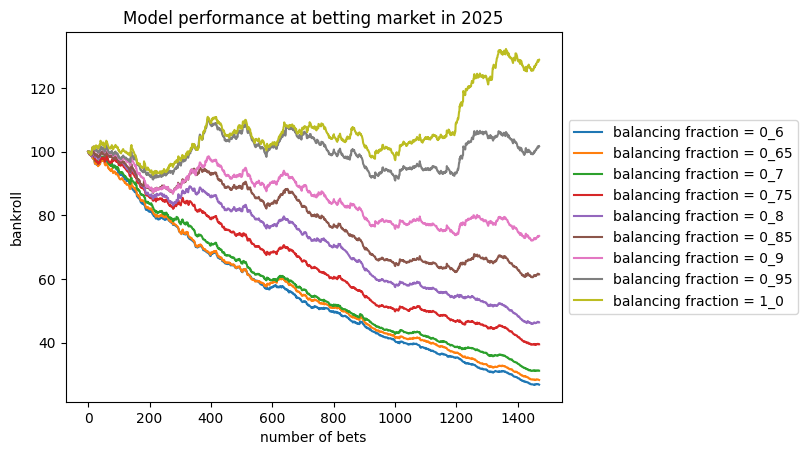

The ending bankrolls of all betting strategies are: [26.83135705688268, 28.277810273690836, 31.18900919544575, 39.48496056740913, 46.3718807676263, 61.45139928668311, 73.51219727403367, 101.71210693476357, 128.87088989383173]
The strategy with the highest ending bankroll is the one with the balancing fraction 1_0 with an amount of 128.87088989383173.


In [198]:
### Explore impact of different model balancings

import joblib

starting_bankroll = 100
fraction_to_bet = 0.05

# Define model suffixes
balancing_fraction = ['0_6', '0_65', '0_7', '0_75', '0_8', '0_85', '0_9', '0_95', '1_0']
Kelly_criterion = [False, True]

for j in range(2):
    end_bankroll = []
    for i in range(len(balancing_fraction)):
        # Define the filename
        model_filename = f'tennis_predictor_model_balanced_{balancing_fraction[i]}.joblib'

        # Load the pre-trained model from the file
        print(f"Loading trained model from {model_filename}...")
        trained_model = joblib.load(model_filename)
        print("✅ Model loaded successfully.")

        # Get predictions from model
        expected_features = trained_model.get_booster().feature_names
        aligned_features = features_betting_odds_df.reindex(columns=expected_features, fill_value=0)


        predictions = trained_model.predict(aligned_features)
        pred_probs = trained_model.predict_proba(aligned_features)[:, 1]

        # Get results of betting sim
        number_bets, bankroll, profits = betting_sim(starting_bankroll, fraction_to_bet , predictions, pred_probs, enable_Kelly_criterion=Kelly_criterion[j], enable_bet_selection=True, selection_treshold = 0.5)

        print(f'The mean profit of this model and betting strategy is {sum(profits)/(len(profits))}.')
        plt.plot(number_bets, bankroll, label = f'balancing fraction = {balancing_fraction[i]}')
        #plt.scatter(number_bets, profits)
        end_bankroll.append(bankroll[-1])

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('number of bets')
    plt.ylabel('bankroll')
    plt.title('Model performance at betting market in 2025')
    plt.show()

    print(f'The ending bankrolls of all betting strategies are: {end_bankroll}')
    print(f'The strategy with the highest ending bankroll is the one with the balancing fraction {balancing_fraction[end_bankroll.index(max(end_bankroll))]} with an amount of {max(end_bankroll)}.')
